**Design Laboratory - Cybersecurity, Reliability and Risk Laboratory**

**AGH University of Science and Technology**

**Faculty:** Computer Science, Electronics and Telecommunications
Field of study:	Electronics and Telecommunications

**Year of study:**	III

**Date:**			24.01.2021

**Students name:**
*   Jakub Pasoń (305259)
*   Seweryn Dumania (305254)
*   Hubert Grygny (296863)


**Topic:** Attacks discovery (phishing) with machine learning

**Supervisor:** Prof. Dr Hab. Piotr Chołda




---
# **1. Abstract**

Phishing is a cybercrime in which a target or targets are contacted by email, telephone, text message or pop-ups on suspicious websites by someone posing as a legitimate institution to lure individuals into providing sensitive data such as personally identifiable information, banking and credit card details, and passwords. There are many ways to determine if someone is trying to extract our private and sensitive information. If a message or any form of contact contains any of these characteristics, then probably someone is trying to scam you: 


*  too good to be true,
*  sense of urgency,
*  misspelled hyperlinks,
*  suspicious attachments,
*  unusual sender


The aim of this project was to use different machine learning methods to determine whether a website is a phishing website or not. After implementation of the methods we will use different methods to check the results.


---
# **2. Approach**

We have decided to choose three different methods in order to compare how they perform with the same dataset. 

The chosen methods were:




##**Support Vector Machines - SVM**


The main purpose behind SVM is creating the hyperplane for a specific dataset, which will separate our data. 



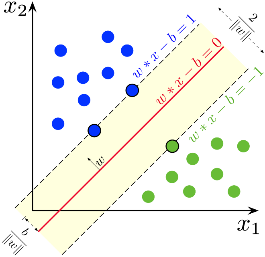

Fig.1  Hyperplane separating two results along with margin and bolded support vectors


SVM algorithms are using mathematical functions which are called kernels. Its purpose is to transform our data into required form. Kernel function is returning the inner product of two points instead of calculating every coordinate, which results in much cheaper computational cost. 

Since we have 30 different parameters on which we will decide whether the website is for phishing purposes, it is impossible to represent it accurately on a 2-dimensional plane.






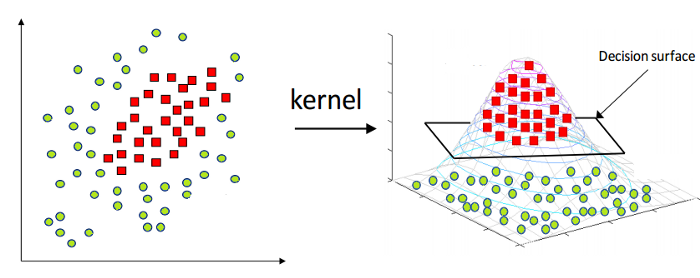

Fig. 2 Kernel trick

---



##**Logistic Regression - LR**




  Logistic regression is a linear classifier, which fits a function called sigmoid represented as 

  $p(x)=\frac{1}{1+e^{-f(x)}}$

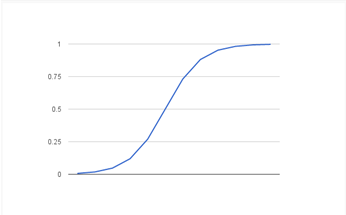

Fig. 3 - Sigmoid function

This method predicts the probability of a certain event occurring based on a
continuous or discrete argument.  It works a lot like linear regression, but the output is
binary instead of some numeric value. As a linear classifier, logistic regression uses
linear representations, in this case a representation called logit: $f(x)=b_{0} + b_{1}*x_{1} + \cdots + b_{r}*x$

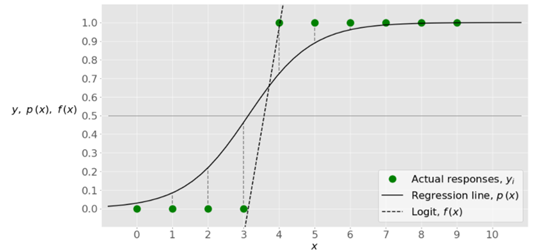

Fig. 4 - Graphical representation of Logical Regression

---



##**Decision Trees - DT**
Decission trees are comonly used in machine learning because of the way it solves problems. It is very clear and illustrative for the user. The strategy of DT is to create tree-like decission model with the consequences of them.    
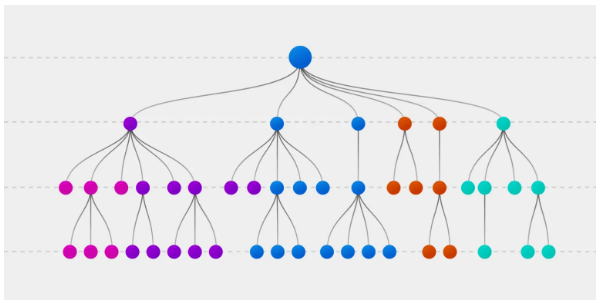

Fig.5 - example of DT 


---
# **3. Implementation**

Before any implementation of these methods was done, we had to format the dataset and split it into two sets (the result and the training data).



Libraries used to format and prepare the data and to analize the result:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

#Comparison libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

Attaching the dataset to the colab notebook

In [ ]:
from google.colab import files
uploaded = files.upload() #uploading dataset from https://www.kaggle.com/akashkr/phishing-website-dataset

Saving dataset.csv to dataset.csv


## **Resampling the data and formatting dataset**

In [ ]:
df = pd.read_csv('dataset.csv', header=0) #Data frame
df.drop('index', axis=1, inplace=True)
df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
df.dtypes

having_IPhaving_IP_Address     int64
URLURL_Length                  int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [ ]:
df['Result'].unique()

array([-1,  1])

In [ ]:
df_result = df[df['Result']==1]       #Legitimate
df_no_result = df[df['Result']==-1]   #Phishing

## **Splitting data into to sets - Result and Data**

In [ ]:
X = df.drop('Result', axis=1).copy()
X.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
y = df['Result'].copy()
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

##**SVM** (Support Vector Machines)

Importing necessary libraries in order to proceed with SVM implementation

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

###**Searching for best operating parameters**

Tuning the best parameters was done with the use of GridSearchCV where we can choose on which parameters we want to test it, which in this case were:

*   gamma - it defines how far the influence of a single training example reaches,
*   C - it behaves as a regularization parameter and it prevents over/under-fitting,
*   cv - it defines the number of folds in a cross validation



In [ ]:
param_grid = [{'C':[0.1, 1, 10, 100, 1000], 'gamma':['scale', 1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}]

optimal_param = GridSearchCV(SVC(), param_grid, cv=5, refit=True, verbose=3)

optimal_param.fit(X_train_scaled, y_train)

optimal_param.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.932, total=   1.8s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.923, total=   1.7s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.931, total=   1.7s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.940, total=   1.7s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=scale, kernel=rbf, score=0.937, total=   1.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   4.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   4.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   4.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.559, total=   4.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.6min finished


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

After obtaining the best parameters the support vector machine could be created.

In [ ]:
clf_svm = SVC(random_state=42, C=100, gamma=0.1, kernel = 'rbf', probability=True)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Plotting the confusion matrix.

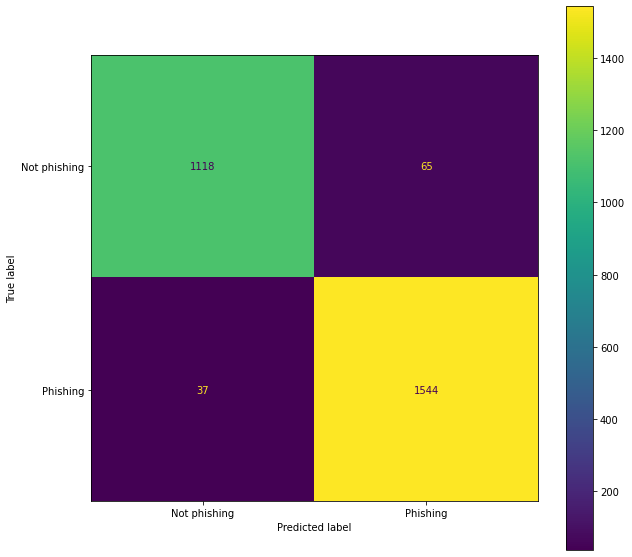

In [ ]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_confusion_matrix(clf_svm, X_test_scaled, y_test, values_format='d', display_labels=["Not phishing","Phishing"], ax = ax)

In [ ]:
svm_pred = clf_svm.predict(X_test_scaled)
accuracy_score(y_test, svm_pred)

0.9630969609261939

In [ ]:
CM = confusion_matrix(y_test, svm_pred)

svm_true_neg = CM[0][0]
svm_false_neg = CM[0][1]
svm_true_pos = CM[1][1]
svm_false_pos = CM[1][0]

In [ ]:
svm_accuracy = (svm_true_pos + svm_true_neg)/(svm_true_pos + svm_true_neg + svm_false_pos + svm_false_neg)
print('Accuracy\t=',svm_accuracy)
svm_sensitivity = svm_true_pos/(svm_true_pos + svm_false_neg)
print('Sensitivity\t=',svm_sensitivity)
svm_specificity = svm_true_neg/(svm_true_neg + svm_false_pos) #more important than sensitivity? (false alarm)
print('Specificity\t=',svm_specificity)
svm_precision = svm_true_pos/(svm_true_pos + svm_false_pos)
print('Precision\t=',svm_precision)
svm_recall = svm_true_pos/(svm_true_pos + svm_false_neg)
print('Recall\t\t=',svm_recall)

Accuracy	= 0.9630969609261939
Sensitivity	= 0.9596022374145432
Specificity	= 0.9679653679653679
Precision	= 0.9765970904490828
Recall		= 0.9596022374145432


##**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

###**Searching for best operating parameters**

The GridSearchCV function was used to tune the appropriate parameters of the model 

penalty -  string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'. The tuning derived, that in this case ‘l1’ is the best,

C - positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.  The tuning derived, that in this case ‘0.08858667904100823’ is the best,

solver - string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'. The tuning derived, that in this case ‘liblinear’ is the best,


In [ ]:
param_grid_lr = [{'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear']}]

optimal_param_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, refit=True, verbose=3)

optimal_param_lr.fit(X_train_scaled, y_train)

optimal_param_lr.best_params_

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.0001, penalty=l1, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV]  C=0.0001, penalty=l2, solver=liblinear, score=0.916, total=   0.0s
[CV] C=0.0001, penalty=l2, solver=liblinear ..........................
[CV

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l1, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l1, solver=liblinear, score=0.448, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l2, solver=liblinear, score=0.920, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l2, solver=liblinear, score=0.919, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=l2, solver=liblinear, score=0.919, total=   0.0s
[CV] C=0.00026366508987303583, penalty=l2, solver=liblinear ..........
[CV]  C=0.00026366508987303583, penalty=

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.2s finished


{'C': 0.08858667904100823, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
model = LogisticRegression( penalty='l1', C = 0.08858667904100823, random_state=0, solver='liblinear')
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.08858667904100823, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p_pred = model.predict_proba(X_test_scaled)
y_pred = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.9229377713458755

In [ ]:
lr_probs = p_pred[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1183
           1       0.93      0.93      0.93      1581

    accuracy                           0.92      2764
   macro avg       0.92      0.92      0.92      2764
weighted avg       0.92      0.92      0.92      2764



In [ ]:
lr_cm = confusion_matrix(y_test,y_pred)
lr_true_neg = lr_cm[0][0]
lr_false_neg = lr_cm[0][1]
lr_true_pos = lr_cm[1][1]
lr_false_pos = lr_cm[1][0]

In [ ]:
lr_accuracy = (lr_true_pos + lr_true_neg)/(lr_true_pos + lr_true_neg + lr_false_pos + lr_false_neg)
print('Accuracy\t=',lr_accuracy)
lr_sensitivity = lr_true_pos/(lr_true_pos + lr_false_neg)
print('Sensitivity\t=',lr_sensitivity)
lr_specificity = lr_true_neg/(lr_true_neg + lr_false_pos) #more important than sensitivity? (false alarm)
print('Specificity\t=',lr_specificity)
lr_precision = lr_true_pos/(lr_true_pos + lr_false_pos)
print('Precision\t=',lr_precision)
lr_recall = lr_true_pos/(lr_true_pos + lr_false_neg)
print('Recall\t\t=',lr_recall)

Accuracy	= 0.9229377713458755
Sensitivity	= 0.9312736443883984
Specificity	= 0.9117147707979627
Precision	= 0.9342188488298545
Recall		= 0.9312736443883984


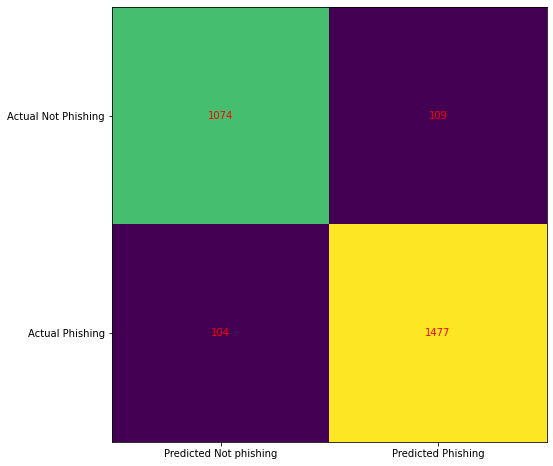

In [ ]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Not phishing', 'Predicted Phishing'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Not Phishing', 'Actual Phishing'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## **Decision Trees**

Importing necessary libraries in order to proceed with DT implementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier            #for building classification tree
from sklearn.tree import plot_tree                         #for drawing classification tree
from sklearn.model_selection import train_test_split       #for splitting data into training and testing
from sklearn.model_selection import cross_val_score        #for cross validation

### **Building non-optimized Decission Tree**

Witthout any additional adjustments of parameters we can obtain non-optimized way of phishing detection. 

In [ ]:
clf_data = DecisionTreeClassifier(random_state = 42)
clf_data = clf_data.fit(X_train_scaled, y_train)

As we can see our tree is extensive and large and the efficience is lower than we expected. 

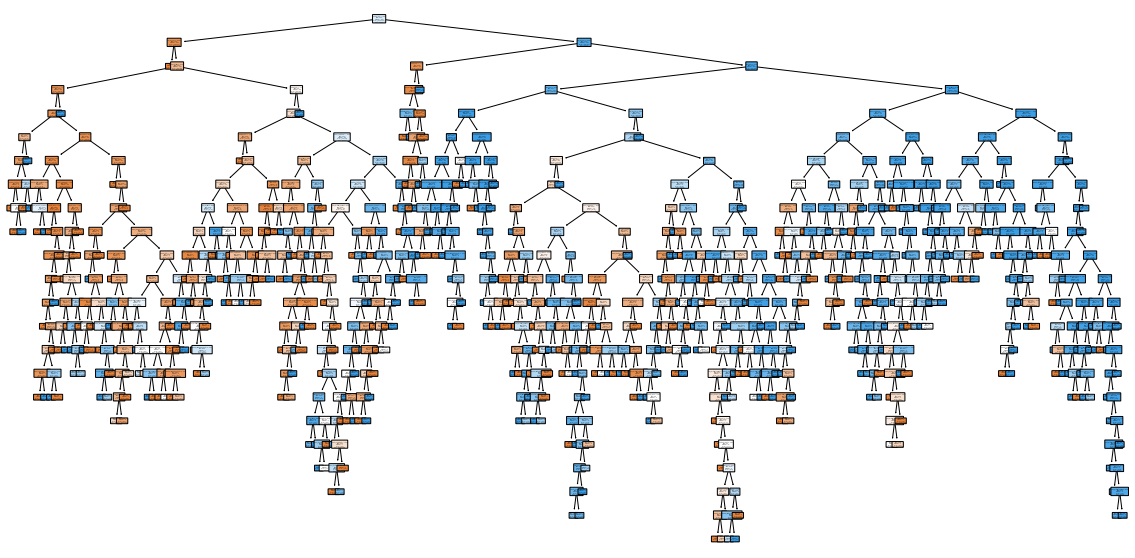

In [ ]:
plt.figure(figsize = (20, 10))
plot_tree(clf_data, filled = True, rounded = True, class_names = ["Non-Phishing", "Phishing"], feature_names = X.columns);

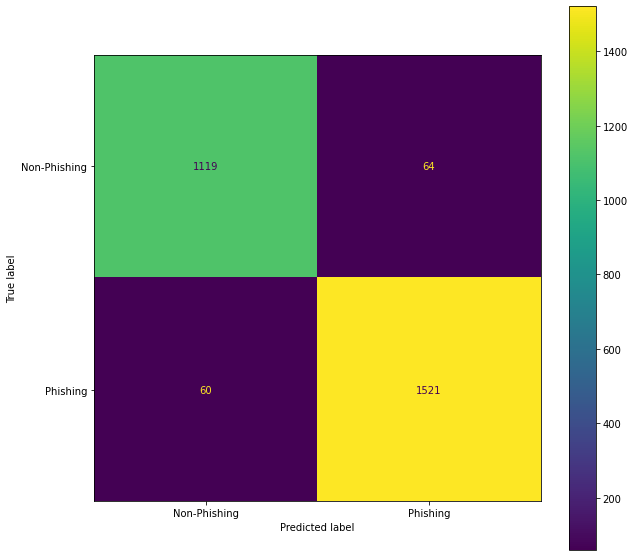

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(clf_data, X_test_scaled, y_test, values_format='d', display_labels = ["Non-Phishing","Phishing"], ax = ax)

###**Searching for best operating parameters**

To achieve better accuracy and more efficien path to detect phishing the new parameter is needed. The value of alpha variable  will be helpful with processing with adjustments of DT method. 

In [ ]:
path = clf_data.cost_complexity_pruning_path(X_train_scaled, y_train)           #determine values for alpha
ccp_alphas = path.ccp_alphas                                                    #extract different values for alpha
ccp_alphas = ccp_alphas[:-1]                                                    #exclude the maximum value for alpha

clf_data_a = []                                                                 #new array for storing the tree

for ccp_alpha in ccp_alphas:
  clf_data = DecisionTreeClassifier(random_state = 0, ccp_alpha = ccp_alpha)
  clf_data.fit(X_train_scaled, y_train)
  clf_data_a.append(clf_data)

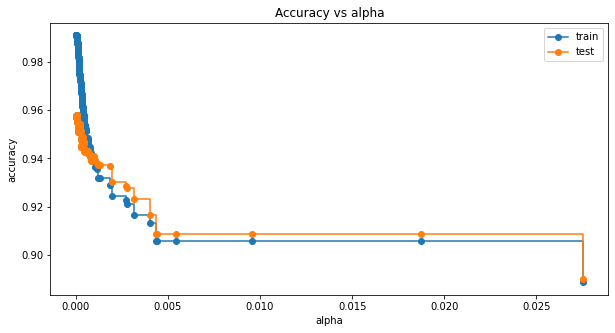

In [ ]:
train_scores = [clf_data.score(X_train_scaled, y_train) for clf_data in clf_data_a]
test_scores = [clf_data.score(X_test_scaled, y_test) for clf_data in clf_data_a]

fig, alphax = plt.subplots(figsize = (10,5))
alphax.set_xlabel("alpha")
alphax.set_ylabel("accuracy")
alphax.set_title("Accuracy vs alpha")
alphax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
alphax.plot(ccp_alphas, test_scores, marker = 'o', label = "test", drawstyle = "steps-post")
alphax.legend()
plt.show()

The best value of alpha will be near to the crossing point of charts above. After limiting the search area wew can a peak of the accuracy as it is shown below.

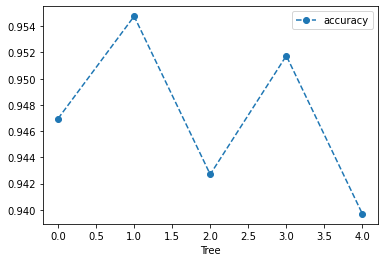

In [ ]:
clf_data = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.0005) #create the tree with alpha = 0.0005
scores = cross_val_score(clf_data, X_train_scaled, y_train, cv = 5)
data_frame = pd.DataFrame(data = {'Tree': range(5), 'accuracy': scores})

data_frame.plot(x = 'Tree', y = 'accuracy', marker = 'o', linestyle = '--')

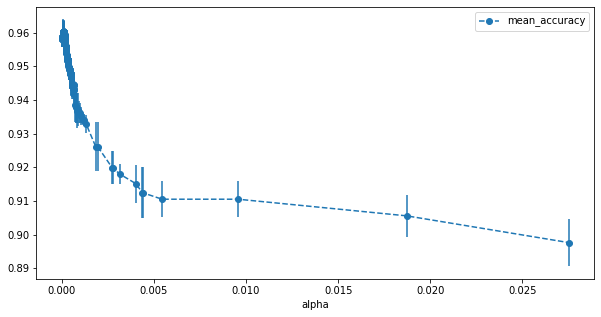

In [ ]:
alpha_loop_values = [] # an array to store alphas

for ccp_alpha in ccp_alphas:
  clf_data = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_data, X_train_scaled, y_train, cv = 5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(figsize = (10,5), x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.00004) &  (alpha_results['alpha'] < 0.00007)]

,alpha,mean_accuracy,std
34,0.000040,0.958872,0.002058
35,0.000040,0.958872,0.002058
36,0.000040,0.958872,0.002058
37,0.000048,0.958992,0.002147
38,0.000051,0.959234,0.002983
39,0.000051,0.959234,0.002983
40,0.000054,0.959113,0.002979
41,0.000055,0.959113,0.002979
42,0.000066,0.959957,0.003540
43,0.000068,0.959957,0.003540


In [ ]:
ideal_ccp_alpha = 0.000051
ideal_ccp_alpha

5.1e-05

Plotting the confusion matrix after optimization.

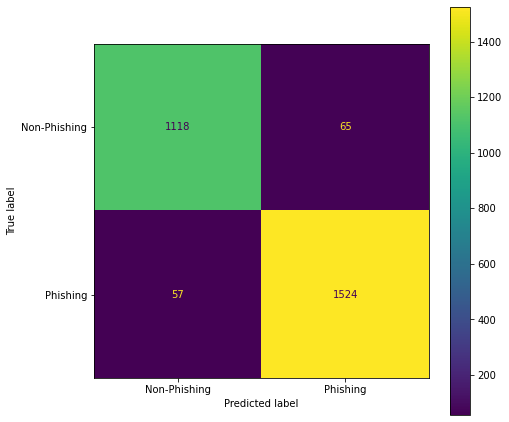

In [ ]:
clf_data_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha=ideal_ccp_alpha)
clf_data_pruned = clf_data_pruned.fit(X_train_scaled, y_train)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
plot_confusion_matrix(clf_data_pruned, X_test_scaled, y_test, values_format='d', display_labels = ["Non-Phishing", "Phishing"], ax = ax)

As we can observe in the figure below, after optimization the tree is less extensive and consist of less amount of branches. It ipmroves the accuracy and efficience of detection.

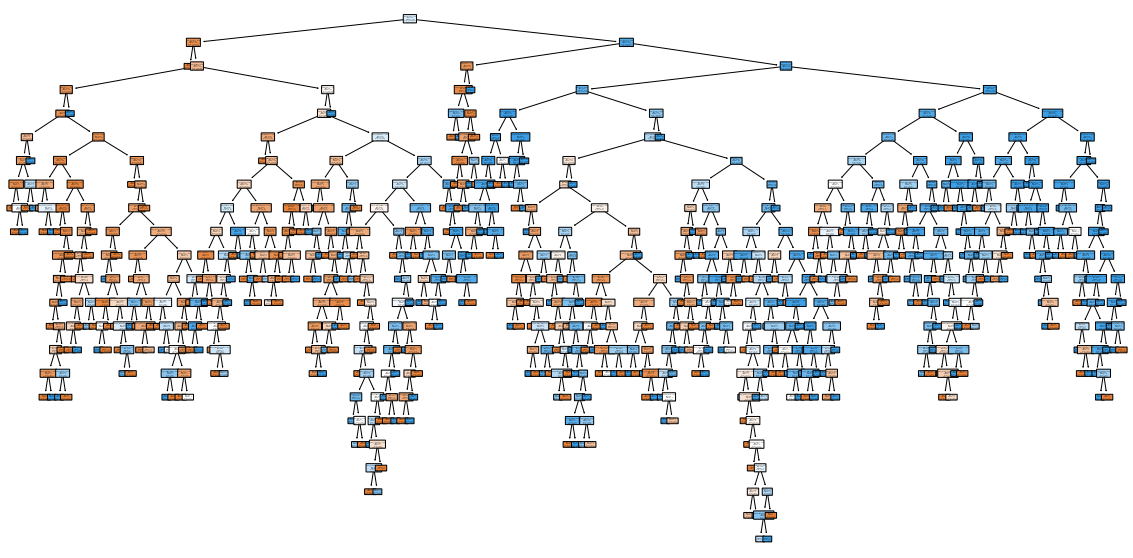

In [ ]:
plt.figure(figsize = (20, 10))
plot_tree(clf_data_pruned, filled = True, rounded = True, class_names = ["Non-Phishing", "Phishing"], feature_names = X.columns);

In [ ]:
dt_y_pred = clf_data_pruned.predict(X_test_scaled)

dt_cm = confusion_matrix(y_test,dt_y_pred)
dt_true_neg = dt_cm[0][0]
dt_false_neg = dt_cm[0][1]
dt_true_pos = dt_cm[1][1]
dt_false_pos = dt_cm[1][0]

In [ ]:
dt_accuracy = (dt_true_pos + dt_true_neg)/(dt_true_pos + dt_true_neg + dt_false_pos + dt_false_neg)
print('Accuracy\t=',dt_accuracy)
dt_sensitivity = dt_true_pos/(dt_true_pos + dt_false_neg)
print('Sensitivity\t=',dt_sensitivity)
dt_specificity = dt_true_neg/(dt_true_neg + dt_false_pos) #more important than sensitivity? (false alarm)
print('Specificity\t=',dt_specificity)
dt_precision = dt_true_pos/(dt_true_pos + dt_false_pos)
print('Precision\t=',dt_precision)
dt_recall = dt_true_pos/(dt_true_pos + dt_false_neg)
print('Recall\t\t=',dt_recall)

Accuracy	= 0.9558610709117221
Sensitivity	= 0.9590937696664569
Specificity	= 0.9514893617021276
Precision	= 0.9639468690702088
Recall		= 0.9590937696664569


## **Receiver operating characteristic**


In [ ]:
r_probs = [0 for _ in range (len(y_test))]
svm_probs = clf_svm.predict_proba(X_test_scaled)
svm_probs = svm_probs[:,1]
dt_probs = clf_data_pruned.predict_proba(X_test_scaled)
dt_probs = dt_probs[:,1]

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)    #false positive rate, true positive rate
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

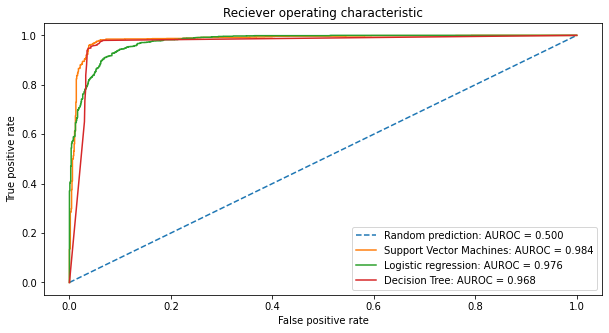

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random prediction: AUROC = %.3f' %r_auc)
plt.plot(svm_fpr, svm_tpr, linestyle = '-', label = 'Support Vector Machines: AUROC = %.3f' %svm_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic regression: AUROC = %0.3f' % lr_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree: AUROC = %0.3f' % dt_auc)

plt.title('Reciever operating characteristic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()

## **Precision recall curve**


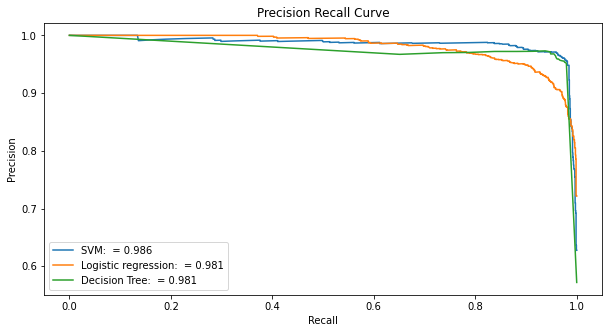

In [ ]:
from sklearn.metrics import average_precision_score
svm_y_score = clf_svm.decision_function(X_test_scaled)
svm_average_pr = average_precision_score(y_test, svm_y_score)
lr_y_score = model.decision_function(X_test_scaled)
lr_average_pr = average_precision_score(y_test, lr_y_score)
dt_y_score = model.decision_function(X_test_scaled)
dt_average_pr = average_precision_score(y_test, dt_y_score)

r_r, r_p, _ = precision_recall_curve(y_test, r_probs)
svm_r, svm_p, _ = precision_recall_curve(y_test, svm_probs)
lr_r, lr_p, _ = precision_recall_curve(y_test, lr_probs)
dt_r, dt_p, _ = precision_recall_curve(y_test, dt_probs)

plt.figure(figsize=(10,5))
plt.plot(svm_p, svm_r, linestyle = '-', label = 'SVM:  = %.3f' %svm_average_pr)
plt.plot(lr_p, lr_r, linestyle = '-', label = 'Logistic regression:  = %.3f' %lr_average_pr)
plt.plot(dt_p, dt_r, linestyle = '-', label = 'Decision Tree:  = %.3f' %dt_average_pr)

plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# **4. Results**

After implemenation we can compare our results with use of different comparison methods.

Parameters     |Support Vector Machines | Decision Trees | Logistic Regression |
----------     |------------------------|----------------|---------------------|
**Accuracy**   |96.3%                   |95.6%           |92.4%                |
**Sensitivity**|96%                     |95.9%           |92.5%                |
**Specificity**|96.8%                   |95.1%           |92.3%                |
**Precision**  |97.7%                   |96.4%           |94.4%                |
**Recall**     |96%                     |95.9%           |92.5%                |


As we can see the SVM was the most efficient machine learning method if it comes to determining whether the website is designed for phishing purpose.

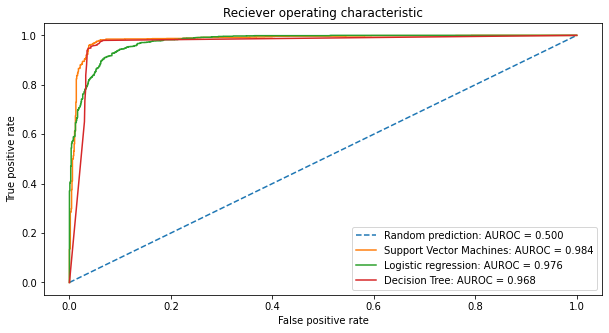

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(r_fpr, r_tpr, linestyle = '--', label = 'Random prediction: AUROC = %.3f' %r_auc)
plt.plot(svm_fpr, svm_tpr, linestyle = '-', label = 'Support Vector Machines: AUROC = %.3f' %svm_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='-', label='Logistic regression: AUROC = %0.3f' % lr_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree: AUROC = %0.3f' % dt_auc)

plt.title('Reciever operating characteristic')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


After plotting the ROC we can also see better efficiency of SVM and it also aplies to the PRC.

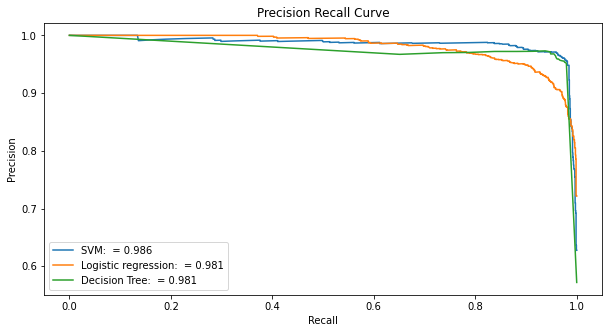

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(svm_p, svm_r, linestyle = '-', label = 'SVM:  = %.3f' %svm_average_pr)
plt.plot(lr_p, lr_r, linestyle = '-', label = 'Logistic regression:  = %.3f' %lr_average_pr)
plt.plot(dt_p, dt_r, linestyle = '-', label = 'Decision Tree:  = %.3f' %dt_average_pr)

plt.title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

As it can be seen, Logistic Regression is not the best machine learning method in cases such as this one. This method is useful when the response variables are binary, but the arguments are continuous. In the dataset we have used, the arguments were split into three values: -1, 0 and 1, that's why Logistic Regression's accuracy in this example is much worse.

# **5. Summary**

This project gave us good insight into machine learning techniques since it was our first encounter with this type of  technology. The main problem we have encountered was formatting and implementing the dataset because we were not familiar with many libraries which were designed for that purpose. Nevertheless we have found this subject very interesting.

# **6. References**

[1] [Phishing](https://www.phishing.org/what-is-phishing#:~:text=Phishing%20is%20a%20cybercrime%20in,credit%20card%20details%2C%20and%20passwords.)

[2] [Dataset](https://www.kaggle.com/akashkr/phishing-website-dataset)

[3] [Kernel Trick](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d)

[4] [SVM and hyperplane](https://en.wikipedia.org/wiki/Support-vector_machine)

[5] [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

[6] [SVM implementation](https://www.youtube.com/watch?v=8A7L0GsBiLQ)

[7] [Logistic Regression in Python](https://realpython.com/logistic-regression-python/)

[8] [DT information](https://www.explorium.ai/blog/the-complete-guide-to-decision-trees/)

[9] [DT implementation](https://www.youtube.com/watch?v=q90UDEgYqeI)